### 4. 训练模型

当代码都准备好，即可在Notebook或终端中执行主控脚本train.sh进行模型训练，示例如下

`!bash demo/train.sh /home/work/data/96159/ /home/work/PretrainedModel/`

示例脚本train.sh的输入参数如下：

`train.sh <数据目录> <模型保存目录> `

- 数据目录：数据集保存目录的绝对路径
- 模型保存目录：请设置为/home/work/PretrainedModel/，否则会造成生成新模型版本时无法读取模型文件。

### 5. 保存模型

Notebook中的模型文件只有保存后，才可以执行发布和部署功能：

- 请确保要保存的模型文件在/home/work/PretrainedModel目录下。模型支持版本管理功能，在保存时可以生成新版本也可以覆盖已有的且尚未部署的模型版本，每个版本的模型都可以独立部署。每个模型版本中保存的模型文件大小上限为1.5GB。

- 在保存模式时也可以将训练模型的代码一并保存。代码支持版本管理功能，用户再次启动Notebook时，可以使用指定的代码版本来初始化Notebook工作空间即/home/work目录下data以外的空间。每个代码版本中保存的文件大小上限为150M

单击Notebook页面右上角工具栏中的“保存模型”即可进行模型与代码的保存。模型保存后，可以在当前项目的“配置模型”列表中查看到已保存的模型。

## 运行示例代码

要运行示例代码，您只需要导入数据集，并根据实际的数据集目录修改下面的代码中的目录即可。

In [ ]:
# 查看当前挂载的数据集目录，目录存放了从BML导入的数据集，该目录下的变更在重启环境后会自动还原
!ls /home/work/data/

In [ ]:
# 查看预置代码模版，demo目录下存放模型训练代码模版
# 建议用户将代码文件和其他文件分开存储，以便选择和保存代码新版本。将代码和其他文件一起提交保存代码版本，可能会导致生成代码版本失败。
!ls /home/work/demo/

In [ ]:
# `demo/train.sh`: 非必需文件，模型训练代码模版的运行入口；可自行编写代码训练自定义模型
# 指定训练数据集及模型保存路径，运行代码模版demo下的train.sh，训练和导出模型
!bash demo/train.sh /home/work/data/1/ /home/work/PretrainedModel/

In [1]:
pip install tensorflow-gpu==2.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

2022-05-30 19:08:21.315305: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 19:08:21.315478: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 19:08:21.315493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [3]:
tf.__version__

'2.1.0'

In [12]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = '0'

In [6]:
a=tf.test.is_built_with_cuda()
print(a)

True


In [4]:
cat /usr/local/cuda/version.txt

CUDA Version 10.1.243


In [5]:
b=tf.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None)
print(b)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


2022-05-25 00:53:30.347812: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-05-25 00:53:30.359082: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2022-05-25 00:53:30.360749: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5654301ba7a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 00:53:30.360826: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 00:53:30.364618: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 00:53:30.551352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 00:53:30.

In [6]:
b=tf.test.is_gpu_available()
print(b)

True


2022-05-25 00:53:36.657411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 00:53:36.658919: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-25 00:53:36.659033: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-25 00:53:36.659049: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-25 00:53:36.659062: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-25 00:53:36.659075: I tensorflow/stream_executor/plat

In [9]:
import tensorflow as tf
tf.test.gpu_device_name()


2022-05-24 23:55:38.135369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 23:55:38.137026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-24 23:55:38.137183: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-24 23:55:38.137201: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-24 23:55:38.137214: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-24 23:55:38.137226: I tensorflow/stream_executor/plat

'/device:GPU:0'

In [11]:
pip install --upgrade tf_slim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 358kB 12.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tf_slim

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [2]:
pip install tflearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 112kB 10.6MB/s eta 0:00:01
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=9bcb3bae936c11fbec1cab3788e553a67ea66c6dd3736bd359e2b218c3efb84e
  Stored in directory: /home/work/.cache/pip/wheels/06/1f/3f/53f1f09f83de828ac8901fae523df825d01cc84e40f7c050b1
Successfully built tflearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%run GRec_TF_Pretrain_topk.py

2022-05-30 18:32:26.848698: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 18:32:26.848855: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 18:32:26.848871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Instructions for updating:
non-resource variables are not supported in the long term
[4 3 0]
[]
1.0
('len(items)', 352112)
Instructions for updating:
Use the `axis` argument instead


2022-05-30 18:32:45.115721: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-30 18:32:45.167259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-30 18:32:45.168935: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-30 18:32:45.169373: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-30 18:32:45.171756: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-30 18:32:45.174243: I tensorflow/stream_executor/platfo

-------------------------------------------------------train1
LOSS: 6.3680195808410645	ITER: 0	BATCH_NO: 311	 STEP:312	 total_batches:2812.5
('TIME FOR BATCH', 0.1988985538482666)
-------------------------------------------------------test1
LOSS: [5.8801575]	ITER: 0	BATCH_NO: 0	 STEP:312	 total_batches:312.5
('TIME FOR BATCH', 0.6680738925933838)
('mrr_5:', 0.003125, 'hit_5:', 0.009375, 'ndcg_5:', 0.004663383967869511)
-------------------------------------------------------train1
LOSS: 5.736684322357178	ITER: 0	BATCH_NO: 623	 STEP:624	 total_batches:2812.5
('TIME FOR BATCH', 0.195969820022583)
-------------------------------------------------------test1
LOSS: [5.6935935]	ITER: 0	BATCH_NO: 0	 STEP:624	 total_batches:312.5
('TIME FOR BATCH', 0.1819770336151123)
('mrr_5:', 0.007291666666666666, 'hit_5:', 0.009375, 'ndcg_5:', 0.0078125)
-------------------------------------------------------train1
LOSS: 6.55208683013916	ITER: 0	BATCH_NO: 935	 STEP:936	 total_batches:2812.5
('TIME FOR BATCH

In [1]:
%matplotlib inline

2022-05-30 19:37:47.747683: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 19:37:47.747858: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-30 19:37:47.747874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Instructions for updating:
non-resource variables are not supported in the long term
[4 3 0]
[]
1.0
('len(all_samples)', 100000)
('len(items)', 352112)
('len(targets)', 6)
Instructions for updating:
Use the `axis` argument instead


2022-05-30 19:38:08.854036: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-30 19:38:08.906224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-30 19:38:08.907910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-30 19:38:08.908347: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-30 19:38:08.910536: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-30 19:38:08.912858: I tensorflow/stream_executor/platfo

INFO:tensorflow:Restoring parameters from Data/Models/generation_model/model_nextitnet_cloze_life10w
[[-0.17475383 -0.08666797 -0.07887345 ... -0.01510082  0.03132416
  -0.08612104]
 [-0.14447422  0.13494867 -0.02916133 ...  0.01589402  0.02101205
  -0.24556355]
 [-0.15337914 -0.05492545  0.06582933 ...  0.11961793  0.18901673
  -0.21244192]
 ...
 [ 0.01399204  0.0215401  -0.02398461 ...  0.04853094 -0.01860397
  -0.01846703]
 [-0.03084998 -0.02172452 -0.03347156 ...  0.02551209 -0.01753107
   0.03704531]
 [ 0.02663969 -0.04692324  0.04238475 ...  0.01887926  0.07960126
  -0.02759694]]


2022-05-30 19:38:48.028240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-30 19:38:50.441256: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


-------------------------------------------------------train1
LOSS: 1.1147739887237549\Reg_LOSS: 0.002095924923196435	ITER: 0	BATCH_NO: 311	 STEP:312	 total_batches:312.5
('TIME FOR BATCH', 0.022388696670532227)
('TIME FOR ITER (mins)', 0.11660779515902202)
-------------------------------------------------------Accuracy
('Accuracy hit:', 0.49404761904761907)
-------------------------------------------------------train1
LOSS: 1.180405616760254\Reg_LOSS: 0.002096674172207713	ITER: 1	BATCH_NO: 311	 STEP:624	 total_batches:312.5
('TIME FOR BATCH', 0.021894216537475586)
('TIME FOR ITER (mins)', 0.114032377799352)
-------------------------------------------------------Accuracy
('Accuracy hit:', 0.5133928571428571)
-------------------------------------------------------train1
LOSS: 1.209611177444458\Reg_LOSS: 0.0021681489888578653	ITER: 2	BATCH_NO: 311	 STEP:936	 total_batches:312.5
('TIME FOR BATCH', 0.02172708511352539)
('TIME FOR ITER (mins)', 0.11316190163294475)
-------------------------

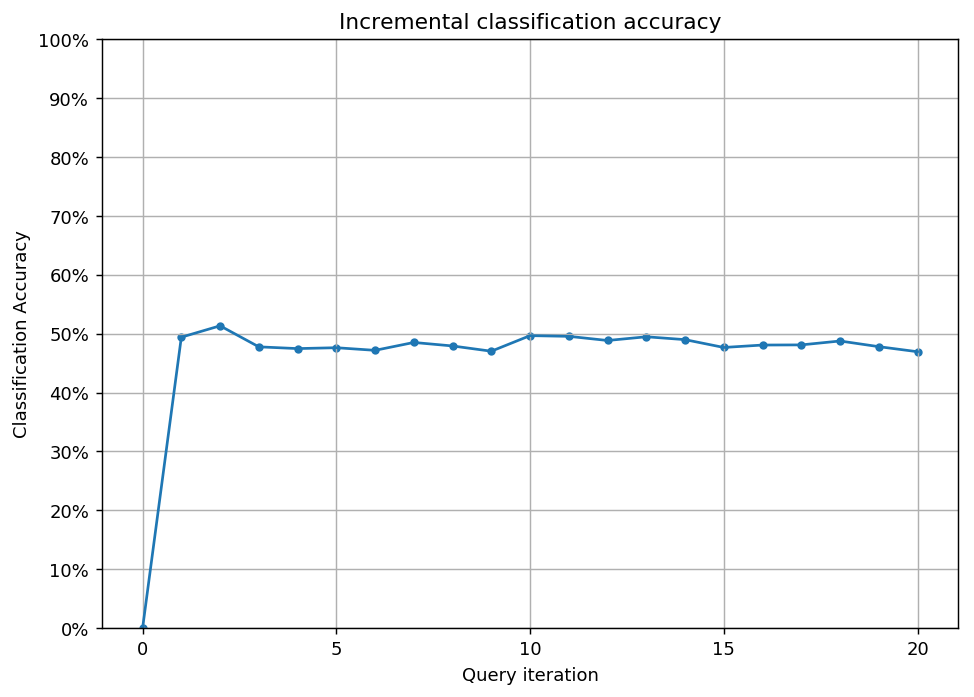

In [2]:
%run PeterRec_noncau_parallel_classifier.py

2022-05-29 21:13:05.172311: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-29 21:13:05.172477: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-05-29 21:13:05.172491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Instructions for updating:
non-resource variables are not supported in the long term
[4 3 0]
[]
1.0
('len(all_samples)', 20000)
('len(items)', 185995)
('len(targets)', 2)
Instructions for updating:
Use the `axis` argument instead


2022-05-29 21:13:11.002818: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-29 21:13:11.055245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 21:13:11.056917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:06:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-29 21:13:11.057401: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-29 21:13:11.059588: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-29 21:13:11.061939: I tensorflow/stream_executor/platfo

INFO:tensorflow:Restoring parameters from Data/Models/generation_model/model_nextitnet_cloze_gen2w
[[ 2.5247041e-02  6.5169603e-02 -8.7743497e-01 ... -3.8870937e-01
  -5.3473759e-02 -2.9102525e-01]
 [ 2.6077864e-01  4.8481435e-01  3.4963563e-01 ...  2.0515900e-02
  -7.2230898e-02  4.3109083e-01]
 [ 5.6085253e-01 -4.1409516e-01  1.4539585e-02 ...  4.6980923e-01
  -4.1076979e-01  2.5822005e-01]
 ...
 [-3.0841442e-02  2.4500925e-02 -4.6469357e-02 ... -1.1543525e-02
  -1.2377279e-02 -6.5380454e-02]
 [ 3.7025087e-02  5.7740707e-04 -2.1100383e-04 ... -1.2356936e-02
   5.6044175e-03 -1.4285838e-02]
 [ 2.1136481e-02  8.5479058e-02 -1.5767191e-02 ...  5.0748356e-02
  -2.4652097e-02  7.7257589e-02]]


2022-05-29 21:13:48.284231: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-29 21:13:50.667696: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


-------------------------------------------------------train1
LOSS: 0.19218574464321136\Reg_LOSS: 0.003222482744604349	ITER: 1	BATCH_NO: 0	 STEP:1000	 total_batches:1000.0
('TIME FOR BATCH', 0.022534847259521484)
('TIME FOR ITER (mins)', 0.3755807876586914)
----------------------------------------------------Valid-Accuracy
('Accuracy hit:', 0.7380952380952381)
------------------------------------------------------Test-Accuracy
('Test-Accuracy hit:', 0.7142857142857143)
-------------------------------------------------------train1
LOSS: 0.17827603220939636\Reg_LOSS: 0.0026045094709843397	ITER: 2	BATCH_NO: 1	 STEP:2000	 total_batches:1000.0
('TIME FOR BATCH', 0.02263164520263672)
('TIME FOR ITER (mins)', 0.377194086710612)
----------------------------------------------------Valid-Accuracy
('Accuracy hit:', 0.7380952380952381)
------------------------------------------------------Test-Accuracy
('Test-Accuracy hit:', 0.7142857142857143)
-----------------------------------------------------

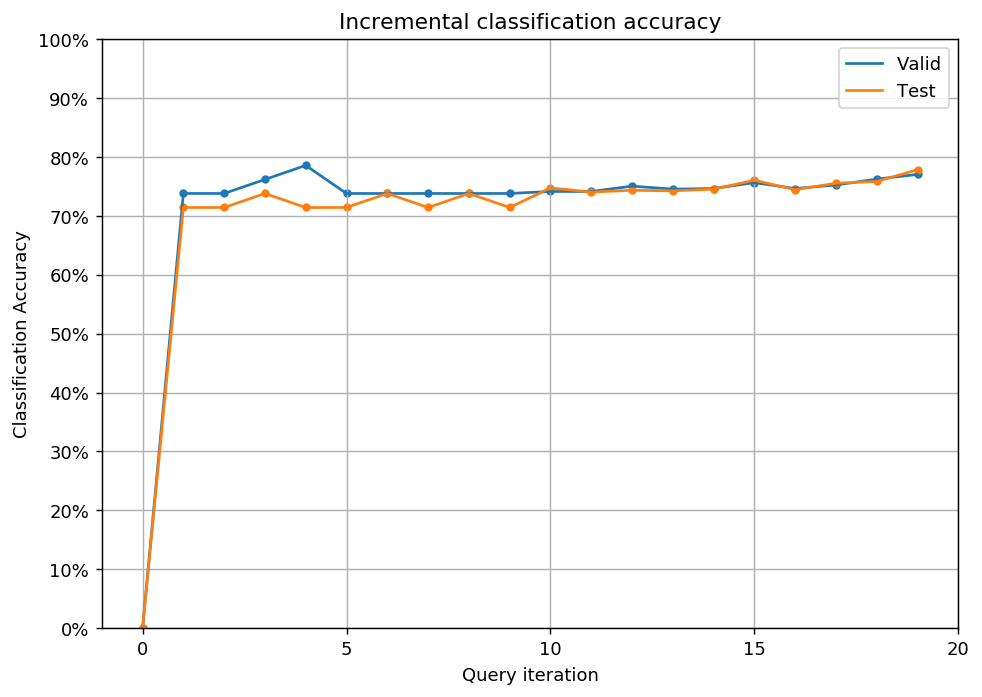

In [1]:
%matplotlib inline
%run peterrec_classifier_copy.py

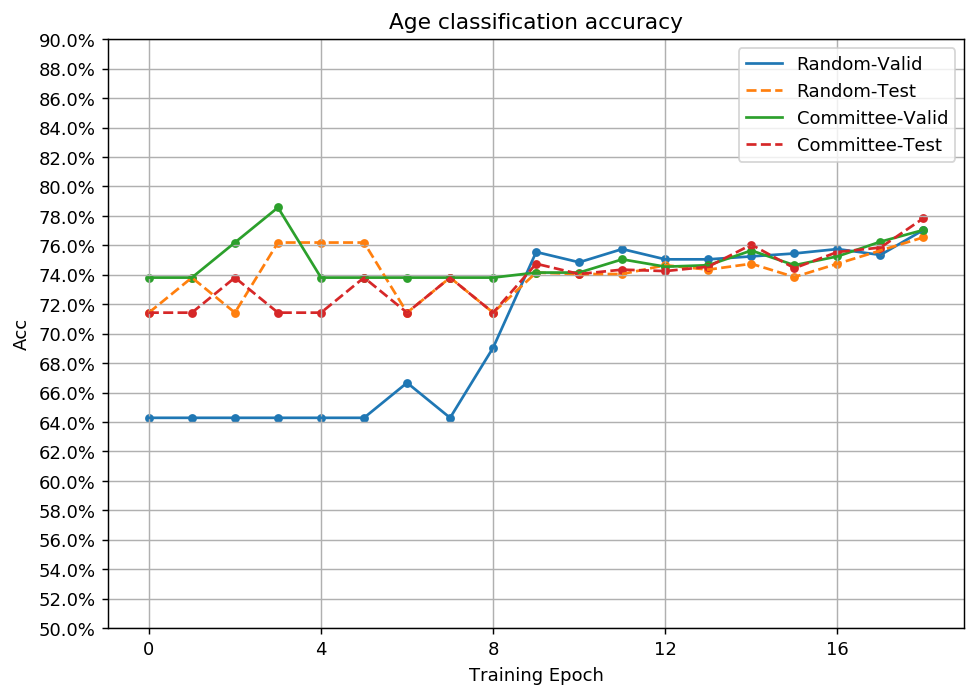

In [5]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy
dataddr = 'data/recordgen2w_rand_valid.csv'
data = pd.read_csv(dataddr,encoding='utf8')
dataddr2 = 'data/recordgen2w_rand_test.csv'
data2 = pd.read_csv(dataddr2,encoding='utf8')
dataddr3 = 'data/recordgen2w_bag_valid.csv'
data3 = pd.read_csv(dataddr3,encoding='utf8')
dataddr4 = 'data/recordgen2w_bag_test.csv'
data4 = pd.read_csv(dataddr4,encoding='utf8')

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.plot(data,label="Random-Valid")
ax.scatter(range(len(data)), data, s=15)
ax.plot(data2,'--',label="Random-Test")
ax.scatter(range(len(data2)), data2, s=15)
ax.plot(data3,label="Committee-Valid")
ax.scatter(range(len(data3)), data3, s=15)
ax.plot(data4,'--',label="Committee-Test")
ax.scatter(range(len(data4)), data4, s=15)
plt.legend(loc='best')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=20,))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0.5, top=0.9)
ax.grid(True)

ax.set_title('Age classification accuracy')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Acc')

plt.show()

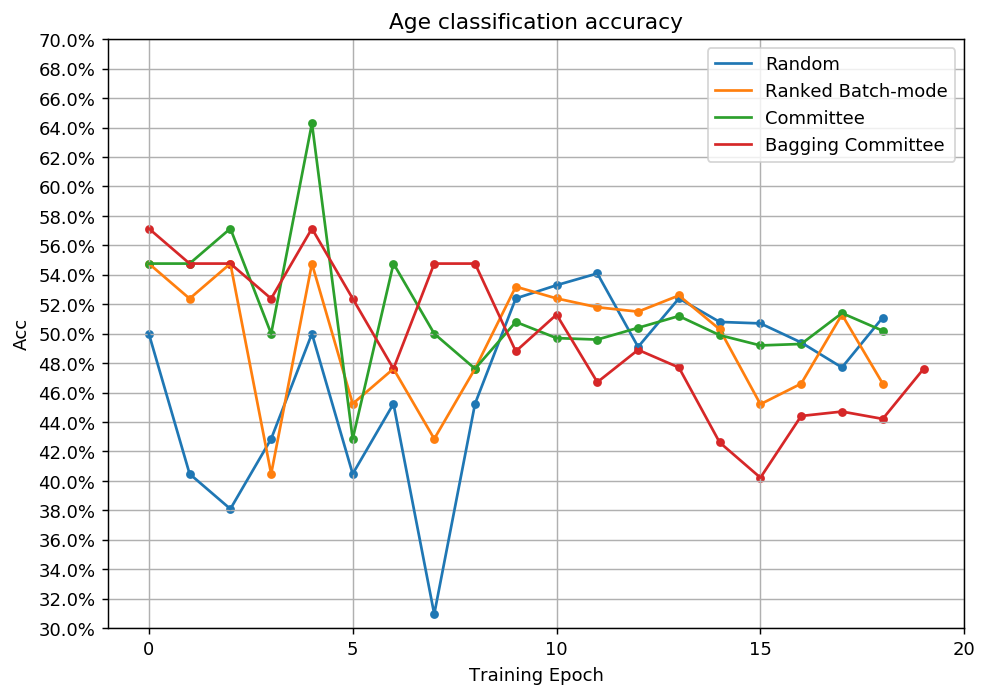

In [4]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy
dataddr = 'data/record1_age.csv'
data = pd.read_csv(dataddr,encoding='utf8')
dataddr2 = 'data/record2_age.csv'
data2 = pd.read_csv(dataddr2,encoding='utf8')
dataddr3 = 'data/record3_age.csv'
data3 = pd.read_csv(dataddr3,encoding='utf8')
dataddr4 = 'data/record4_age.csv'
data4 = pd.read_csv(dataddr4,encoding='utf8')

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.plot(data,label="Random")
ax.scatter(range(len(data)), data, s=15)
ax.plot(data2,label="Ranked Batch-mode")
ax.scatter(range(len(data2)), data2, s=15)
ax.plot(data3,label="Committee")
ax.scatter(range(len(data3)), data3, s=15)
ax.plot(data4,label="Bagging Committee")
ax.scatter(range(len(data4)), data4, s=15)
plt.legend(loc='best')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=20,))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0.3, top=0.7)
ax.grid(True)

ax.set_title('Age classification accuracy')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Acc')

plt.show()

Text(0,0.5,'Acc')

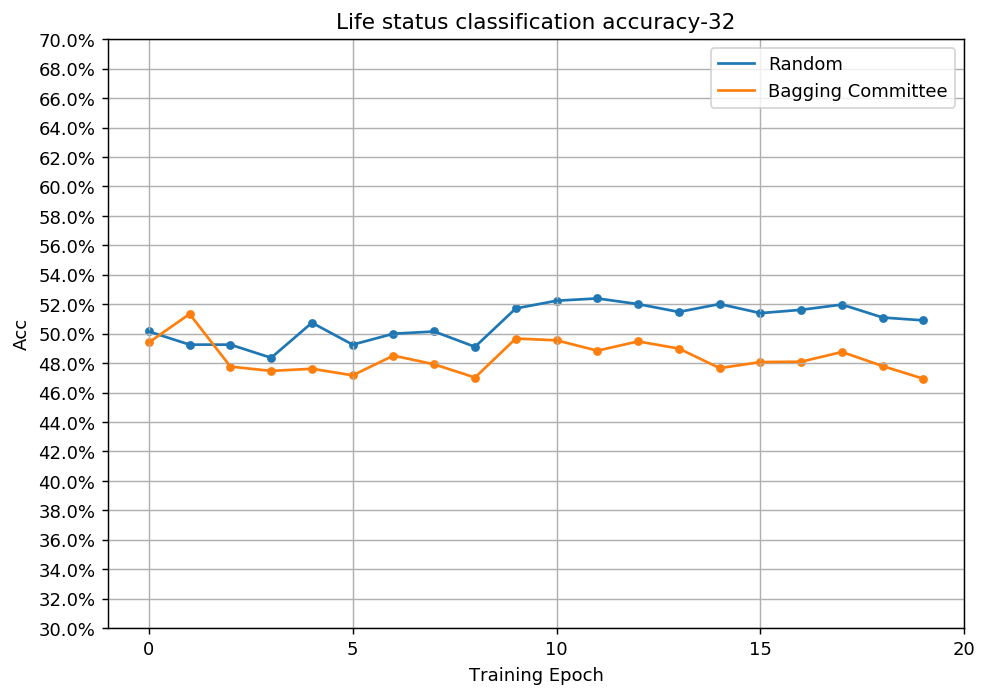

In [4]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy
dataddr = 'data/recordlife10w_rand_32.csv'
data = pd.read_csv(dataddr,encoding='utf8')

dataddr4 = 'data/recordlife10w_bag_32.csv'
data4 = pd.read_csv(dataddr4,encoding='utf8')

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.plot(data,label="Random")
ax.scatter(range(len(data)), data, s=15)

ax.plot(data4,label="Bagging Committee")
ax.scatter(range(len(data4)), data4, s=15)
plt.legend(loc='best')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=20,))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0.3, top=0.7)
ax.grid(True)

ax.set_title('Life status classification accuracy-32')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Acc')

In [11]:
data2

,0.000000000000000000e+00
0,0.404762
1,0.357143
2,0.285714
3,0.261905
4,0.357143
...,...
94,0.480040
95,0.462076
96,0.473054
97,0.470060


In [1]:
initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.02, seed=1)

NameError: name 'tf' is not defined

In [ ]:
data

In [7]:
import numpy as np 

TypeError: 'module' object is not callable

In [10]:
all_samples=np.zeros(10)

In [11]:
train_set, valid_set = all_samples[:-9], all_samples[-9:]

In [12]:
train_set

array([0.])

In [13]:
valid_set

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])